<a href="https://colab.research.google.com/github/Jasiel17/Crime-Prevention/blob/master/Crime_Prevention_Training_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # 
import pandas.util.testing as tm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.layers import Dense,Convolution2D,Dropout,MaxPooling2D,BatchNormalization,Flatten
from keras.models import Sequential,Model
from tensorflow.python.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dir0 = os.path.join(os.getcwd(), '/content/drive/My Drive/Colab Notebooks/data/entrenamiento')
train_guns = dir0 + os.sep 
dir1 = os.path.join(os.getcwd(), '/content/drive/My Drive/Colab Notebooks/data/validacion')
test_guns = dir1 + os.sep 
model = os.path.join(os.getcwd(), '/content/drive/My Drive/Colab Notebooks/modelo')
model_gunsdir = model +os.sep

In [ ]:
data_train = ImageDataGenerator(
    rescale = 1./255, 
    zoom_range = 0.3,
    horizontal_flip=True,
    rotation_range = .15).flow_from_directory(train_guns,
                                              target_size= (100,100),
                                              classes= ["armas_blancas","armas_fuego"],
                                              batch_size=32,
                                              class_mode ='categorical')
    

Found 1332 images belonging to 2 classes.


In [ ]:
data_test = ImageDataGenerator(
            rescale = 1./255).flow_from_directory(
                              test_guns,
                              target_size = (100,100),
                              batch_size = 32,
                              class_mode = 'categorical')

Found 208 images belonging to 2 classes.


[1. 0.]


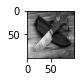

[1. 0.]


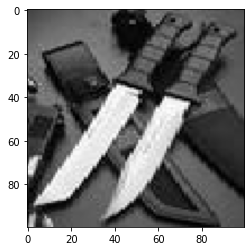

[0. 1.]


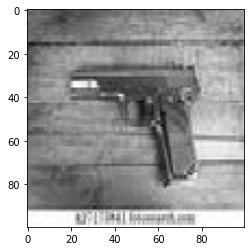

[0. 1.]


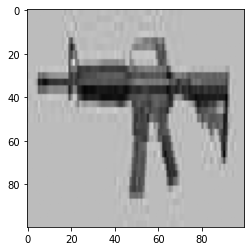

[0. 1.]


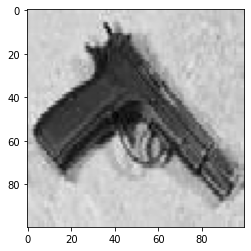

[1. 0.]


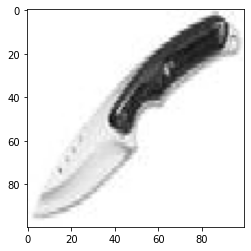

In [ ]:
x,y = data_test.next()
plt.subplot(4,3,2)
for i in range(0,6):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()

In [ ]:
model_guns= Sequential()
model_guns.add(Convolution2D(32,(3,3),padding = "Same",input_shape=(100,100,3),activation="relu"))
model_guns.add(MaxPooling2D(pool_size=(3,3)))
model_guns.add(Dropout(0.2))

model_guns.add(Convolution2D(64,(3,3),padding = "Same",activation="relu"))
model_guns.add(MaxPooling2D(pool_size=(3,3)))
model_guns.add(Dropout(0.2))

model_guns.add(Convolution2D(128,(3,3),padding = "Same",activation="relu"))
model_guns.add(MaxPooling2D(pool_size=(3,3)))
model_guns.add(Dropout(0.2))

model_guns.add(Flatten())
model_guns.add(Dense(512, activation = "relu"))
model_guns.add(Dropout(0.4))

model_guns.add(Dense(256,activation="relu"))
model_guns.add(Dropout(0.3))

model_guns.add(Dense(2,activation="softmax"))

In [ ]:
model_guns.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)      

In [ ]:
clbk= keras.callbacks.EarlyStopping(monitor='accuracy',mode='min')

In [ ]:
model_guns.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_guns.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)      

In [ ]:
history_1 = model_guns.fit(data_train,
                           epochs=10,
                           verbose=1,
                           validation_data=data_test,
                           shuffle=False,
                           validation_steps=10)


Epoch 1/10
42/42 [==============================] - 20s 477ms/step - loss: 0.3412 - accuracy: 0.8604 - val_loss: 0.1927 - val_accuracy: 0.8980
Epoch 2/10
42/42 [==============================] - 19s 461ms/step - loss: 0.3724 - accuracy: 0.8446 - val_loss: 0.2034 - val_accuracy: 0.9013
Epoch 3/10
42/42 [==============================] - 19s 464ms/step - loss: 0.3476 - accuracy: 0.8596 - val_loss: 0.2630 - val_accuracy: 0.8958
Epoch 4/10
42/42 [==============================] - 19s 459ms/step - loss: 0.2996 - accuracy: 0.8731 - val_loss: 0.3622 - val_accuracy: 0.8849
Epoch 5/10
42/42 [==============================] - 19s 463ms/step - loss: 0.2817 - accuracy: 0.8859 - val_loss: 0.0688 - val_accuracy: 0.9479
Epoch 6/10
42/42 [==============================] - 20s 464ms/step - loss: 0.3098 - accuracy: 0.8716 - val_loss: 0.1931 - val_accuracy: 0.8421
Epoch 7/10
42/42 [==============================] - 19s 456ms/step - loss: 0.2926 - accuracy: 0.8776 - val_loss: 0.0909 - val_accuracy: 0.9410

In [ ]:

history_1.history

{'accuracy': [0.8603604,
  0.8445946,
  0.8596096,
  0.8731231,
  0.8858859,
  0.8716216,
  0.8776276,
  0.8926426,
  0.9016517,
  0.8956456],
 'loss': [0.34071803656784266,
  0.37365139398846897,
  0.3458318944807883,
  0.29954869861717337,
  0.2826736530026158,
  0.31090179631659937,
  0.292678268285127,
  0.2765768105919297,
  0.2553924154769909,
  0.2450480330008286],
 'val_accuracy': [0.8980262875556946,
  0.9013158082962036,
  0.8958333134651184,
  0.8848684430122375,
  0.9479166865348816,
  0.8421052694320679,
  0.9409722089767456,
  0.9111841917037964,
  0.9243420958518982,
  0.9444444179534912],
 'val_loss': [0.19272524118423462,
  0.20342451333999634,
  0.2630365788936615,
  0.3622172772884369,
  0.06880313903093338,
  0.19309262931346893,
  0.09094133228063583,
  0.2668439745903015,
  0.14998817443847656,
  0.08063789457082748]}

In [ ]:
model_guns.save(model_gunsdir+"model_guns.h5")

In [ ]:
model_guns.save_weights(model_gunsdir+"pesos_guns.h5")

Text(0.5, 1.0, 'Curva de Progresion Perdida')

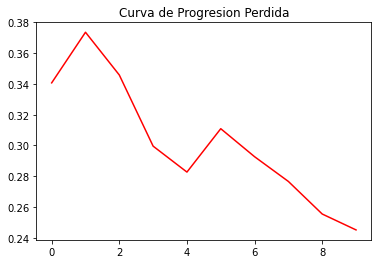

In [ ]:
# Graficando la Perdida del Modelo
loss= history_1.history["loss"]
plt.plot(loss,color="r")
plt.title("Curva de Progresion Perdida")

Text(0.5, 1.0, ' Accuracy progression curve')

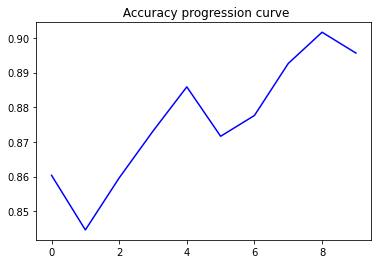

In [ ]:
# Graficando la exactitud del modelo
acc= history_1.history["accuracy"]
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")